In [27]:
import numpy as np
import matplotlib.pyplot as plt

#Question-1

In [28]:
# S = {r, w, e, s}
P =np.array([ [0.5,0.3, 0, 0.2],
              [0.2, 0.5, 0.1, 0.2],
              [0.1,0.3, 0.3, 0.3],
              [0, 0.2, 0.3, 0.5]])

In [29]:
def markov_chain_evolution(numSteps, initialStateDistribution, transititonProbabilityMatrix):
  #TPM of the markov process is given by the matrix transititonProbabilityMatrix
  #pi(0) is the initialStateDistribution
  #pi(numSteps) is the finalStateDistribution after executing numSteps on the pi(0)

  #we start at pi(0)
  currentStateDistribution = initialStateDistribution
  for i in range(numSteps):
    currentStateDistribution = np.dot(currentStateDistribution, transititonProbabilityMatrix)
  mat = transititonProbabilityMatrix
  for i in range(numSteps-1):
    mat = np.dot(mat, transititonProbabilityMatrix)
  print(f"P{numSteps}={mat}")
  return currentStateDistribution


##Part-a


In [30]:
#To see the evolution after 20 min we observe pi(20)
numSteps = 20
#Assuming equally probable distribution for initialStateDistribution
initialDistribution = np.array([0.25, 0.25,0.25,0.25])

#Distribution after 20 steps
DistributionAfter20 = markov_chain_evolution(numSteps,initialDistribution, P)
print("Distribution after 20 steps", DistributionAfter20)

P20=[[0.17073182 0.33604338 0.18157173 0.31165307]
 [0.17073177 0.33604337 0.18157177 0.31165309]
 [0.17073168 0.33604336 0.18157183 0.31165313]
 [0.17073159 0.33604334 0.1815719  0.31165317]]
Distribution after 20 steps [0.17073172 0.33604336 0.18157181 0.31165311]


In [31]:
#For P(X20=s|X0=r) we can take the initial distribution as [1,0,0,0]
initialDistribution = np.array([1,0,0,0])
#Distribution after 20 steps
DistributionAfter20 = markov_chain_evolution(numSteps,initialDistribution, P)
print("Distribution after 20 steps", DistributionAfter20)
print("P(X20=s|X0=r)",DistributionAfter20[3])

P20=[[0.17073182 0.33604338 0.18157173 0.31165307]
 [0.17073177 0.33604337 0.18157177 0.31165309]
 [0.17073168 0.33604336 0.18157183 0.31165313]
 [0.17073159 0.33604334 0.1815719  0.31165317]]
Distribution after 20 steps [0.17073182 0.33604338 0.18157173 0.31165307]
P(X20=s|X0=r) 0.3116530652582661


##Part-b

In [32]:
#To see the evolution after 25 min we observe pi(25)
numSteps = 25
#Assuming equally probable distribution for initialStateDistribution
initialDistribution = np.array([0.25, 0.25,0.25,0.25])

#Distribution after 25 steps
DistributionAfter25 = markov_chain_evolution(numSteps,initialDistribution, P)
print("Distribution after 25 steps", DistributionAfter25)

P25=[[0.17073171 0.33604336 0.18157181 0.31165312]
 [0.17073171 0.33604336 0.18157181 0.31165312]
 [0.17073171 0.33604336 0.18157182 0.31165312]
 [0.1707317  0.33604336 0.18157182 0.31165312]]
Distribution after 25 steps [0.17073171 0.33604336 0.18157182 0.31165312]


In [33]:
#For P(X25=s|X20=s)=P(X5=s|X0=s) we can take the initial distribution as [0,0,0,1]
initialDistribution = np.array([0,0,0,1])
#Distribution after 5 steps
numSteps=5
DistributionAfter5 = markov_chain_evolution(numSteps,initialDistribution, P)
print("Distribution after 5 steps", DistributionAfter5)
print("P(X25=s|X20=s)",DistributionAfter5[3])

P5=[[0.18329 0.33794 0.17257 0.3062 ]
 [0.17693 0.3376  0.17692 0.30855]
 [0.16788 0.33559 0.18363 0.3129 ]
 [0.15883 0.33359 0.19032 0.31726]]
Distribution after 5 steps [0.15883 0.33359 0.19032 0.31726]
P(X25=s|X20=s) 0.31726


##Part-c

In [34]:
def computingStationaryDistribution(P):
  PT=np.transpose(P)

  # Eigenvalues and eigenvectors of the transpose
  eigenvalues, eigenvectors = np.linalg.eig(PT)

  # Find the eigenvector corresponding to eigenvalue 1 to obtain the relevant stationary distribution
  stationary_distri = eigenvectors[:,np.where(np.isclose(eigenvalues, 1))[0][0]]

  # Normalize the stationary distribution to 0-1 scale
  stationary_distri /= np.sum(stationary_distri)

  return stationary_distri

In [35]:
StationaryDistri = computingStationaryDistribution(P)
print(f"Stationery Distribution obtained is{StationaryDistri}")

Stationery Distribution obtained is[0.17073171 0.33604336 0.18157182 0.31165312]


##Part-d

In [36]:
def limitingDistribution(initialDistribution):
  currentDistribution = initialDistribution
  iter=0
  while(np.dot(currentDistribution, P)[0]!=currentDistribution[0] or np.dot(currentDistribution, P)[1]!=currentDistribution[1] or np.dot(currentDistribution, P)[2]!=currentDistribution[2] or np.dot(currentDistribution, P)[3]!=currentDistribution[3]):
    iter+=1
    currentDistribution=np.dot(currentDistribution, P)
    # print(currentDistribution,np.dot(currentDistribution, P))
  print(f"Convergence obtained after iter {iter} for initialDistribution:{initialDistribution}")
  print("limiting Distribution:",currentDistribution,"product of limiting Distribution with P: for check",np.dot(currentDistribution, P))

In [37]:
initialDistribution1 = np.array([0.25,0.25,0.25,0.25])
initialDistribution2 = np.array([1,0,0,0])
initialDistribution3 = np.array([0,0,0,1])
initialDistribution4 = np.array([0.5,0,0,0.5])
limitingDistribution(initialDistribution1)
limitingDistribution(initialDistribution2)
limitingDistribution(initialDistribution3)
limitingDistribution(initialDistribution4)

Convergence obtained after iter 46 for initialDistribution:[0.25 0.25 0.25 0.25]
limiting Distribution: [0.17073171 0.33604336 0.18157182 0.31165312] product of limiting Distribution with P: for check [0.17073171 0.33604336 0.18157182 0.31165312]
Convergence obtained after iter 50 for initialDistribution:[1 0 0 0]
limiting Distribution: [0.17073171 0.33604336 0.18157182 0.31165312] product of limiting Distribution with P: for check [0.17073171 0.33604336 0.18157182 0.31165312]
Convergence obtained after iter 49 for initialDistribution:[0 0 0 1]
limiting Distribution: [0.17073171 0.33604336 0.18157182 0.31165312] product of limiting Distribution with P: for check [0.17073171 0.33604336 0.18157182 0.31165312]
Convergence obtained after iter 43 for initialDistribution:[0.5 0.  0.  0.5]
limiting Distribution: [0.17073171 0.33604336 0.18157182 0.31165312] product of limiting Distribution with P: for check [0.17073171 0.33604336 0.18157182 0.31165312]


#Question-2

In [38]:
def randomWalkProbability(numSteps,p):
  mat = np.zeros((2*numSteps+1,2*numSteps+1))
  #matrix of random walk probability where p is the probability of moving forward while 1-p is the probability of moving back by a step

  #2*numSteps is the num of possible steps numSteps being max steps that can be forward and numSteps being max steps that can be backward
  for i in range(2*numSteps+1):
    if(i>0):
      mat[i][i-1]=1-p
    if(i<2*numSteps):
      mat[i][i+1]=p

  #Since we start at the ith state, I have assume state of index numSteps to be i for simplicity
  start_state = np.zeros(2*numSteps+1)
  start_state[numSteps]=1 #as we start here

  for i in range(numSteps):
      start_state = np.dot(start_state, mat)

  return start_state


In [39]:
def RandomWalkSimulator(numSteps,p):
  currPosition = 0
  positions = np.zeros(numSteps + 1)
  positions[0]=currPosition
  for i in range(numSteps):
    if np.random.rand() < p:
      currPosition += 1
    else:
      currPosition -= 1
    positions[i + 1] = currPosition
  # for i in range(numSteps):
  #   print(i)
  return positions

In [40]:
val = np.arange(0,1001)-500
val

array([-500, -499, -498, ...,  498,  499,  500])

##Part-a

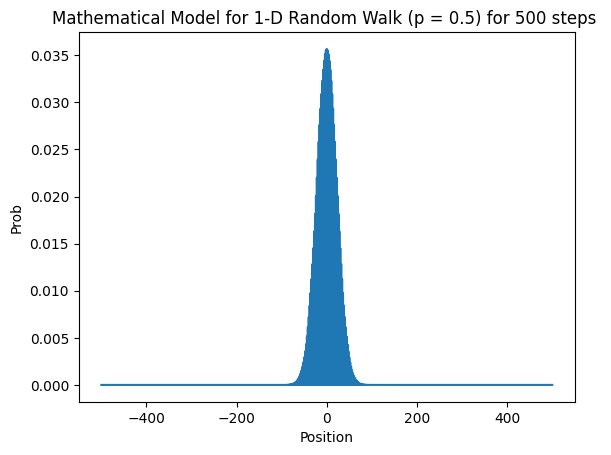

In [41]:
WalkProbability = randomWalkProbability(500,0.5)
plt.plot(val,WalkProbability)
plt.xlabel("Position")
plt.ylabel("Prob")
plt.title("Mathematical Model for 1-D Random Walk (p = 0.5) for 500 steps ")
plt.show()

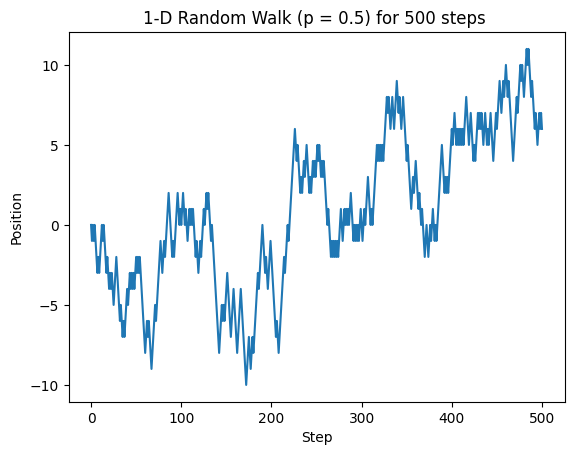

In [42]:
positionsarr = RandomWalkSimulator(500,0.5)
plt.plot(positionsarr)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1-D Random Walk (p = 0.5) for 500 steps ")
plt.show()

In [43]:
simulatedProbability = np.mean(positionsarr == positionsarr[-1])
print("Simulated probability obtained:", simulatedProbability)
print("Expected probability obtained:", WalkProbability[int(positionsarr[-1])+500])

Simulated probability obtained: 0.06986027944111776
Expected probability obtained: 0.03440599844505551


##Part-b

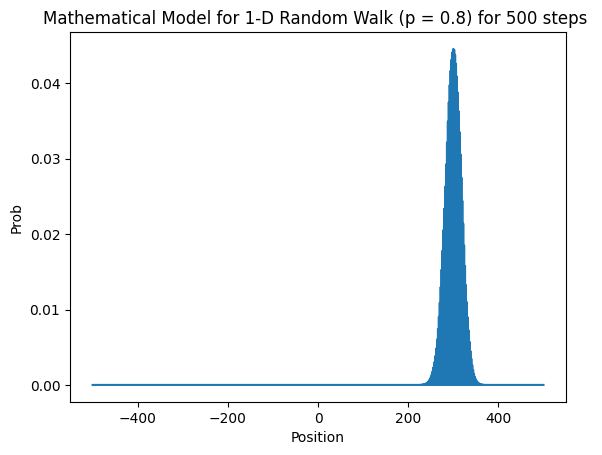

In [44]:
WalkProbability = randomWalkProbability(500,0.8)
plt.plot(val,WalkProbability)
plt.xlabel("Position")
plt.ylabel("Prob")
plt.title("Mathematical Model for 1-D Random Walk (p = 0.8) for 500 steps ")
plt.show()

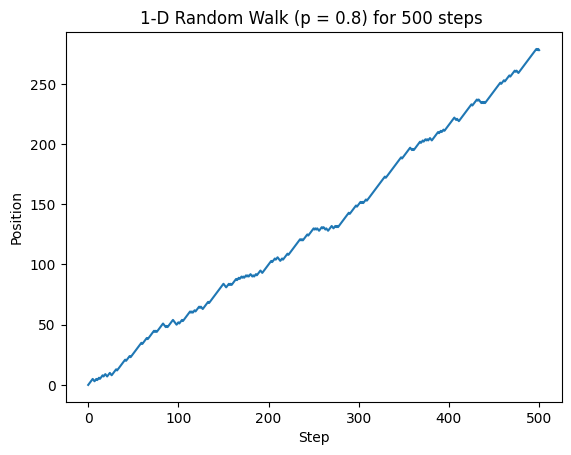

In [45]:
positionsarr = RandomWalkSimulator(500,0.8)
plt.plot(positionsarr)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1-D Random Walk (p = 0.8) for 500 steps ")
plt.show()

In [46]:
simulatedProbability = np.mean(positionsarr == positionsarr[-1])
print("Simulated probability obtained:", simulatedProbability)
print("Expected probability obtained:", WalkProbability[int(positionsarr[-1])+500])

Simulated probability obtained: 0.005988023952095809
Expected probability obtained: 0.020535398896613193


##Part-c

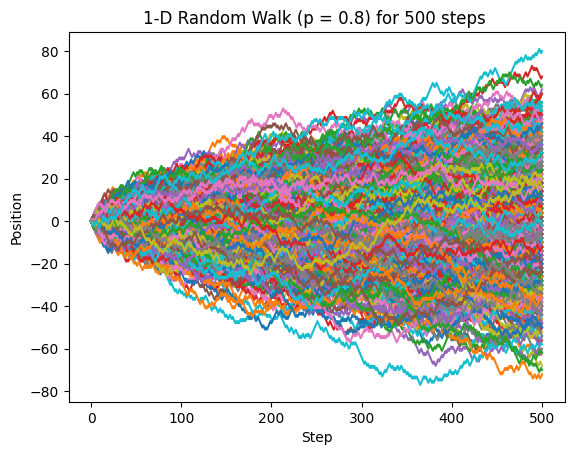

In [47]:
randomWalk = np.zeros(1001)
p=0.5
for i in range(1000):
  positions = RandomWalkSimulator(500,p)
  plt.plot(positions)
  randomWalk[int(positions[-1])+500]+=1

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1-D Random Walk (p = 0.8) for 500 steps ")
plt.show()


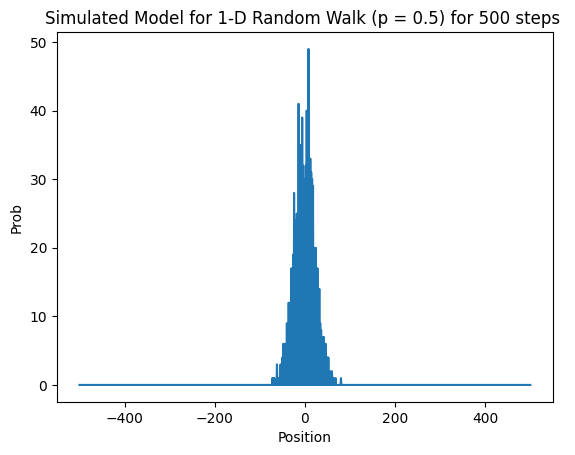

In [48]:
plt.plot(val,randomWalk)
plt.xlabel("Position")
plt.ylabel("Prob")
plt.title("Simulated Model for 1-D Random Walk (p = 0.5) for 500 steps ")
plt.show()

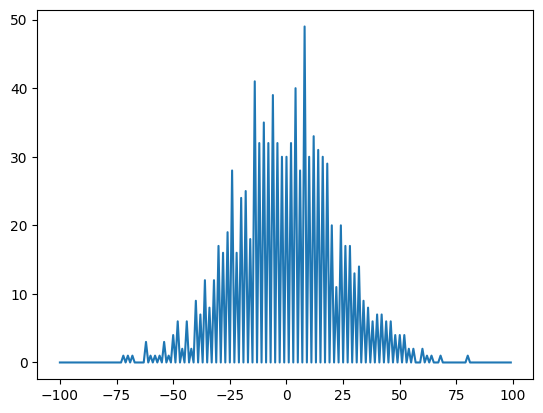

In [49]:
plt.plot(val[400:600],randomWalk[400:600])
plt.show()

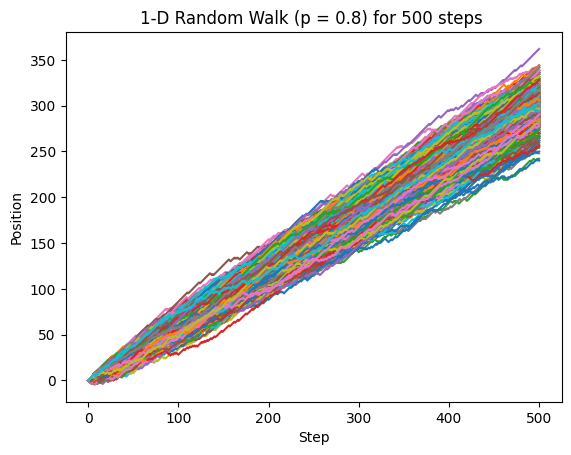

In [50]:
randomWalk = np.zeros(1001)
p=0.8
for i in range(1000):
  positions = RandomWalkSimulator(500,p)
  plt.plot(positions)
  randomWalk[int(positions[-1])+500]+=1

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1-D Random Walk (p = 0.8) for 500 steps ")
plt.show()

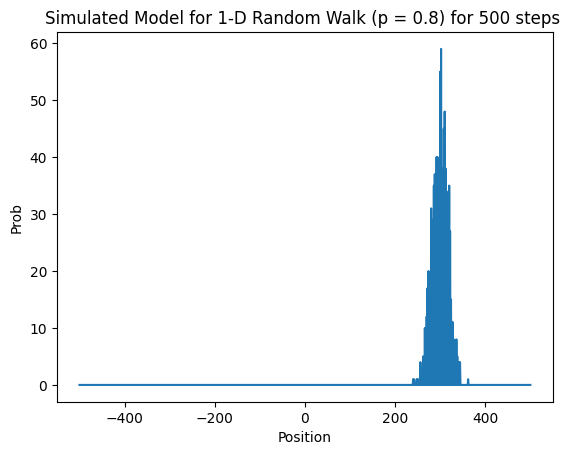

In [51]:
plt.plot(val,randomWalk)
plt.xlabel("Position")
plt.ylabel("Prob")
plt.title("Simulated Model for 1-D Random Walk (p = 0.8) for 500 steps ")
plt.show()

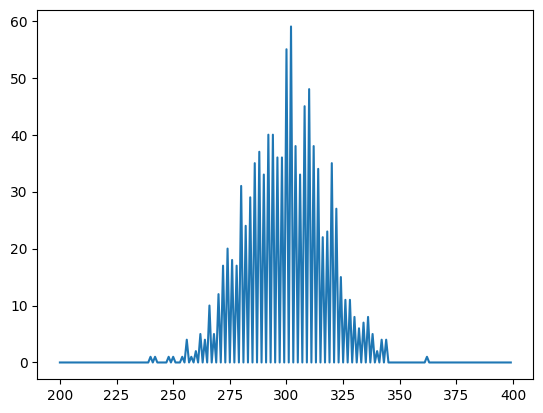

In [52]:
plt.plot(val[700:900],randomWalk[700:900])
plt.show()